<a href="https://colab.research.google.com/github/Felipepa9/MADSI/blob/main/ENTREGA_3_%7C%7C_CIENCIA_DE_DATOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar el dataset
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/CIENCIA DE DATOS/DATA_MAD.csv')
data.head()

,scheduled_flight_leg_block_off_date,scheduled_flight_leg_block_off_time,scheduled_flight_leg_block_off_date_utc,scheduled_flight_leg_block_off_time_utc,marketing_airline_code,operating_flight_num,origin_leg_iata_airport_code,destination_leg_iata_airport_code,flight_leg_registration_code,actual_flight_leg_fleet_name,...,FLIGHT_KEY,POS_DISP_TOTALES,total_pax_qty,total_capacity_leg_qty,fo_pct,pax_weight_kg_qty,pax_bags_qty,pax_bags_net_weight_kg_qty,total_pax_qty_est,maximum_payload_kg_qty
0,2024-11-06,00:45:00,2024-11-05,23:45:00,LA,2485,MAD,LIM,CCBGE,B789,...,2485MADLIM2024-11-06,36,NaN,NaN,NaN,24554.0,370.0,6842.0,296.0,49853.0
1,2024-11-06,22:40:00,2024-11-06,21:40:00,LA,8065,MAD,GRU,CCBGD,B789,...,8065MADGRU2024-11-06,36,303.0,298.0,1.016779,NaN,NaN,NaN,NaN,NaN
2,2024-11-06,15:30:00,2024-11-06,14:30:00,LA,711,MAD,BOG,CCBBF,B787,...,711MADBOG2024-11-06,28,252.0,243.0,1.037037,18571.0,224.0,3936.0,223.0,44078.0
3,2024-11-06,23:35:00,2024-11-06,22:35:00,LA,705,MAD,SCL,CCBGH,B789,...,705MADSCL2024-11-06,36,301.0,300.0,1.003333,NaN,NaN,NaN,NaN,NaN
4,2024-11-05,15:30:00,2024-11-05,14:30:00,LA,711,MAD,BOG,CCBBA,B787,...,711MADBOG2024-11-05,28,216.0,243.0,0.888889,18317.0,195.0,3744.0,219.0,43421.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Observación de valores nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3791 entries, 0 to 3790
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   scheduled_flight_leg_block_off_date      3791 non-null   object 
 1   scheduled_flight_leg_block_off_time      3791 non-null   object 
 2   scheduled_flight_leg_block_off_date_utc  3791 non-null   object 
 3   scheduled_flight_leg_block_off_time_utc  3791 non-null   object 
 4   marketing_airline_code                   3791 non-null   object 
 5   operating_flight_num                     3791 non-null   int64  
 6   origin_leg_iata_airport_code             3791 non-null   object 
 7   destination_leg_iata_airport_code        3791 non-null   object 
 8   flight_leg_registration_code             3775 non-null   object 
 9   actual_flight_leg_fleet_name             3775 non-null   object 
 10  actual_flight_leg_fleet_name_code        3775 no

In [4]:
data.isnull().sum()

,0
scheduled_flight_leg_block_off_date,0
scheduled_flight_leg_block_off_time,0
scheduled_flight_leg_block_off_date_utc,0
scheduled_flight_leg_block_off_time_utc,0
marketing_airline_code,0
operating_flight_num,0
origin_leg_iata_airport_code,0
destination_leg_iata_airport_code,0
flight_leg_registration_code,16
actual_flight_leg_fleet_name,16


In [5]:
# Observación de las variables categoricas nominales determinantes y Limpieza de variables categoricas nominales que NO se tendrán en cuenta en el análisis,
# porque son tipos de aeronaves que ya NO se usan en las rutas origen MAD

data['actual_flight_leg_fleet_name'].unique()

array(['B789', 'B787', nan, 'B777', 'B767', 'A321'], dtype=object)

In [6]:
data.drop(data[data['actual_flight_leg_fleet_name'] == 'A321'].index,inplace=True)
data.drop(data[data['actual_flight_leg_fleet_name'] == 'nan'].index,inplace=True)

In [7]:
data.dropna(subset=['flight_leg_registration_code','actual_flight_leg_fleet_name','actual_flight_leg_fleet_name_code'], inplace=True)

In [8]:
data['actual_flight_leg_fleet_name'].unique()

array(['B789', 'B787', 'B777', 'B767'], dtype=object)

In [9]:
data.isnull().sum()

,0
scheduled_flight_leg_block_off_date,0
scheduled_flight_leg_block_off_time,0
scheduled_flight_leg_block_off_date_utc,0
scheduled_flight_leg_block_off_time_utc,0
marketing_airline_code,0
operating_flight_num,0
origin_leg_iata_airport_code,0
destination_leg_iata_airport_code,0
flight_leg_registration_code,0
actual_flight_leg_fleet_name,0


In [10]:
# Remplazó de los datos nulos con el promedio general de la columna; ya que no se requiere una segmentación, ya que todos los tipos de aeronave y destino comparten las mismas
# caracteristicas para el despegue.

AVG_total_pax_qty = round(data['total_pax_qty'].mean())
AVG_total_capacity_leg_qty = round(data['total_capacity_leg_qty'].mean())
AVG_fo_pct = data['fo_pct'].mean()
AVG_pax_weight_kg_qty = round(data['pax_weight_kg_qty'].mean())
AVG_pax_bags_qty = round(data['pax_bags_qty'].mean())
AVG_pax_bags_net_weight_kg_qty = round(data['pax_bags_net_weight_kg_qty'].mean())
AVG_total_pax_qty_est = round(data['total_pax_qty_est'].mean())
AVG_maximum_payload_kg_qty = round(data['maximum_payload_kg_qty'].mean())

In [11]:
data['total_pax_qty'].fillna(AVG_total_pax_qty, inplace=True)
data['total_capacity_leg_qty'].fillna(AVG_total_capacity_leg_qty, inplace=True)
data['fo_pct'].fillna(AVG_fo_pct, inplace=True)
data['pax_weight_kg_qty'].fillna(AVG_pax_weight_kg_qty, inplace=True)
data['pax_bags_qty'].fillna(AVG_pax_bags_qty, inplace=True)
data['pax_bags_net_weight_kg_qty'].fillna(AVG_pax_bags_net_weight_kg_qty, inplace=True)
data['total_pax_qty_est'].fillna(AVG_total_pax_qty_est, inplace=True)
data['maximum_payload_kg_qty'].fillna(AVG_maximum_payload_kg_qty, inplace=True)

<ipython-input-11-6518a4e46d1b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['total_pax_qty'].fillna(AVG_total_pax_qty, inplace=True)
<ipython-input-11-6518a4e46d1b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3772 entries, 0 to 3790
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   scheduled_flight_leg_block_off_date      3772 non-null   object 
 1   scheduled_flight_leg_block_off_time      3772 non-null   object 
 2   scheduled_flight_leg_block_off_date_utc  3772 non-null   object 
 3   scheduled_flight_leg_block_off_time_utc  3772 non-null   object 
 4   marketing_airline_code                   3772 non-null   object 
 5   operating_flight_num                     3772 non-null   int64  
 6   origin_leg_iata_airport_code             3772 non-null   object 
 7   destination_leg_iata_airport_code        3772 non-null   object 
 8   flight_leg_registration_code             3772 non-null   object 
 9   actual_flight_leg_fleet_name             3772 non-null   object 
 10  actual_flight_leg_fleet_name_code        3772 non-nul

In [13]:
data['Kg_disp_carga'] = data['maximum_payload_kg_qty'] - data['pax_bags_net_weight_kg_qty'] - data['pax_weight_kg_qty']

In [14]:
data['pos_disp_carga'] = data['POS_DISP_TOTALES'] - round(data['pax_bags_qty']/35)

In [16]:
data = data.drop(['scheduled_flight_leg_block_off_date', 'scheduled_flight_leg_block_off_time', 'scheduled_flight_leg_block_off_date_utc',
                  'scheduled_flight_leg_block_off_time_utc','marketing_airline_code','operating_flight_num','origin_leg_iata_airport_code',
                  'destination_leg_iata_airport_code','flight_leg_registration_code','actual_flight_leg_fleet_name',
                  'actual_flight_leg_fleet_name_code','FLIGHT_KEY'], axis=1)

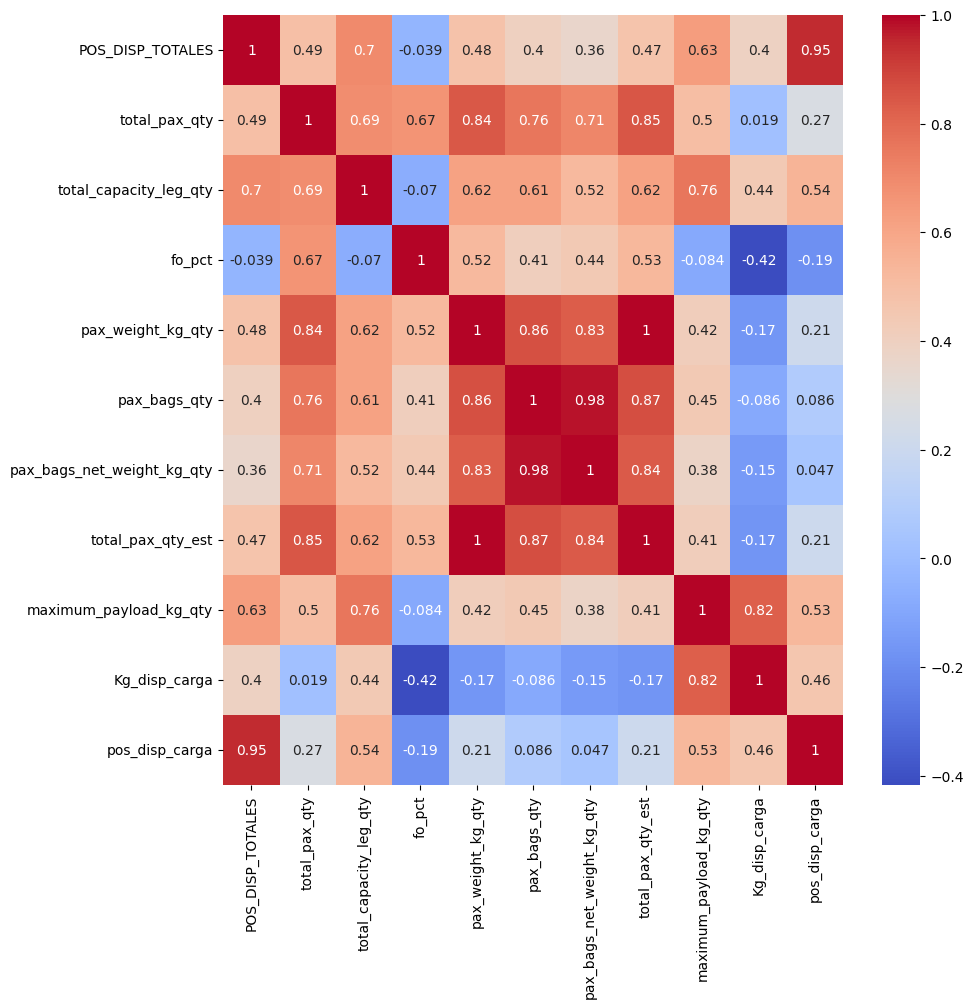

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

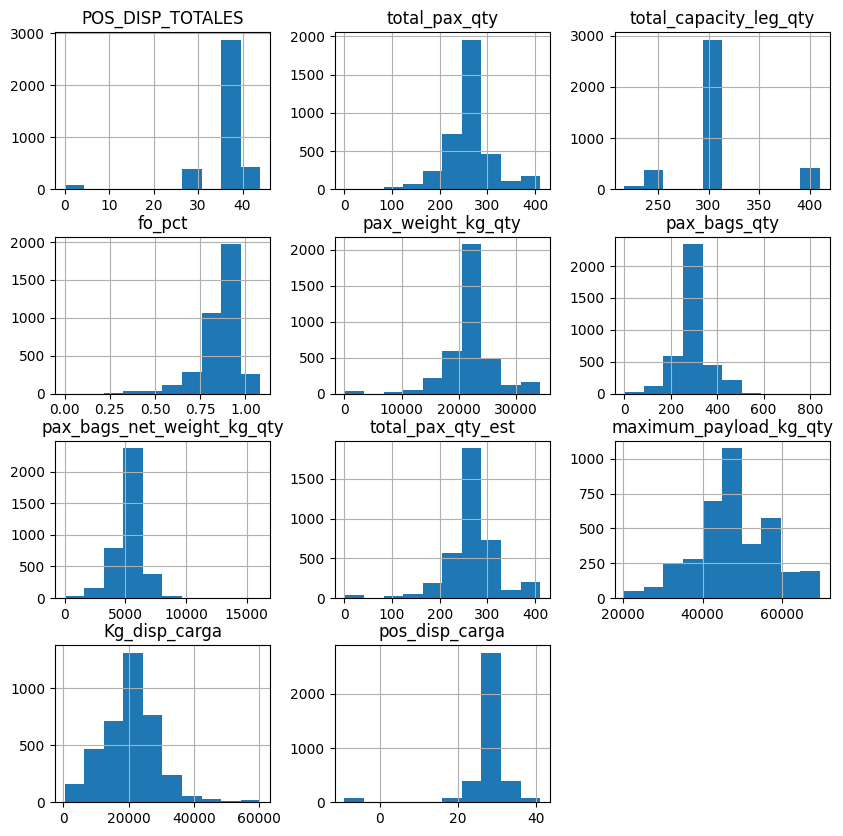

In [20]:
data.hist(figsize=(10, 10))
plt.show()

In [22]:
data_clean_kg_carga = data

data_clean_pos_carga = data

data_clean_kg_carga

,POS_DISP_TOTALES,total_pax_qty,total_capacity_leg_qty,fo_pct,pax_weight_kg_qty,pax_bags_qty,pax_bags_net_weight_kg_qty,total_pax_qty_est,maximum_payload_kg_qty,Kg_disp_carga,pos_disp_carga
0,36,264.0,305.0,0.864894,24554.0,370.0,6842.0,296.0,49853.0,18457.0,25.0
1,36,303.0,298.0,1.016779,21996.0,294.0,5242.0,268.0,47832.0,20594.0,28.0
2,28,252.0,243.0,1.037037,18571.0,224.0,3936.0,223.0,44078.0,21571.0,22.0
3,36,301.0,300.0,1.003333,21996.0,294.0,5242.0,268.0,47832.0,20594.0,28.0
4,28,216.0,243.0,0.888889,18317.0,195.0,3744.0,219.0,43421.0,21360.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...
3786,28,164.0,243.0,0.674897,13861.0,173.0,3331.0,165.0,32842.0,15650.0,23.0
3787,36,251.0,304.0,0.825658,20823.0,301.0,5285.0,254.0,56035.0,29927.0,27.0
3788,36,243.0,300.0,0.810000,21996.0,294.0,5242.0,268.0,47832.0,20594.0,28.0
3789,36,203.0,300.0,0.676667,21996.0,294.0,5242.0,268.0,47832.0,20594.0,28.0


In [28]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['POS_DISP_TOTALES','total_pax_qty','total_capacity_leg_qty','fo_pct',
                        'pax_weight_kg_qty','pax_bags_qty','pax_bags_net_weight_kg_qty','total_pax_qty_est',
                        'maximum_payload_kg_qty','Kg_disp_carga','pos_disp_carga']
for column in columns_to_normalize:
    scaler = MinMaxScaler()
    data_clean_kg_carga[column] = scaler.fit_transform(data_clean_kg_carga[[column]])
data_clean_kg_carga.head()

,POS_DISP_TOTALES,total_pax_qty,total_capacity_leg_qty,fo_pct,pax_weight_kg_qty,pax_bags_qty,pax_bags_net_weight_kg_qty,total_pax_qty_est,maximum_payload_kg_qty,Kg_disp_carga,pos_disp_carga
0,0.818182,0.642336,0.455959,0.799122,0.716466,0.438909,0.424626,0.720195,0.599866,0.300710,0.68
1,0.818182,0.737226,0.419689,0.939457,0.641825,0.348754,0.325327,0.652068,0.558810,0.336322,0.74
2,0.636364,0.613139,0.134715,0.958175,0.541887,0.265718,0.244275,0.542579,0.482550,0.352603,0.62
3,0.818182,0.732360,0.430052,0.927034,0.641825,0.348754,0.325327,0.652068,0.558810,0.336322,0.74
4,0.636364,0.525547,0.134715,0.821293,0.534475,0.231317,0.232359,0.532847,0.469203,0.349087,0.62


In [29]:
from sklearn.model_selection import train_test_split

X = data_clean_kg_carga.drop('Kg_disp_carga', axis=1)
y = data_clean_kg_carga['Kg_disp_carga']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3017, 10), (755, 10), (3017,), (755,))

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor

In [31]:
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
svm = SVR()
rf = RandomForestRegressor()
xgbreg = XGBRegressor()

In [33]:
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)
svm.fit(X_train, y_train)
xgbreg.fit(X_train, y_train)
rf.fit(X_train, y_train)

vr = VotingRegressor(estimators=[('lr', lr), ('knn', knn), ('dt', dt), ('svm', svm), ('rf', rf)])
vr.fit(X_train, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('knn', KNeighborsRegressor()),
                            ('dt', DecisionTreeRegressor()), ('svm', SVR()),
                            ('rf', RandomForestRegressor())])

In [36]:
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

modelos = [lr, knn, dt, svm, rf, vr, xgbreg]
nombres_modelos = ['Linear Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Support Vector Machine', 'Random Forest', 'Ensemble', 'XGBoost']

metricas_modelos= pd.DataFrame(columns=['RMSE', 'MAE', 'R2'], index=nombres_modelos)

for model, name in zip(modelos, nombres_modelos):
    predictions = model.predict(X_test)
    # Aplicar la transformación inversa a las predicciones para observar las metricas en la escala original
    # esto es necesario ya que se normalizó la variable objetivo
    predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
    real_values = scaler.inverse_transform(y_test.values.reshape(-1, 1))
    rmse = root_mean_squared_error(real_values, predictions)
    mae = mean_absolute_error(real_values, predictions)
    r2 = r2_score(real_values, predictions)
    rmse = round(rmse, 3)
    mae = round(mae, 3)
    r2 = round(r2, 3)
    metricas_modelos.loc[name, :] = [rmse, mae, r2]


metricas_modelos

,RMSE,MAE,R2
Linear Regression,0.0,0.0,1.0
K-Nearest Neighbors,0.015,0.008,0.989
Decision Tree,0.021,0.011,0.979
Support Vector Machine,0.059,0.053,0.836
Random Forest,0.017,0.006,0.987
Ensemble,0.015,0.012,0.989
XGBoost,0.014,0.006,0.99


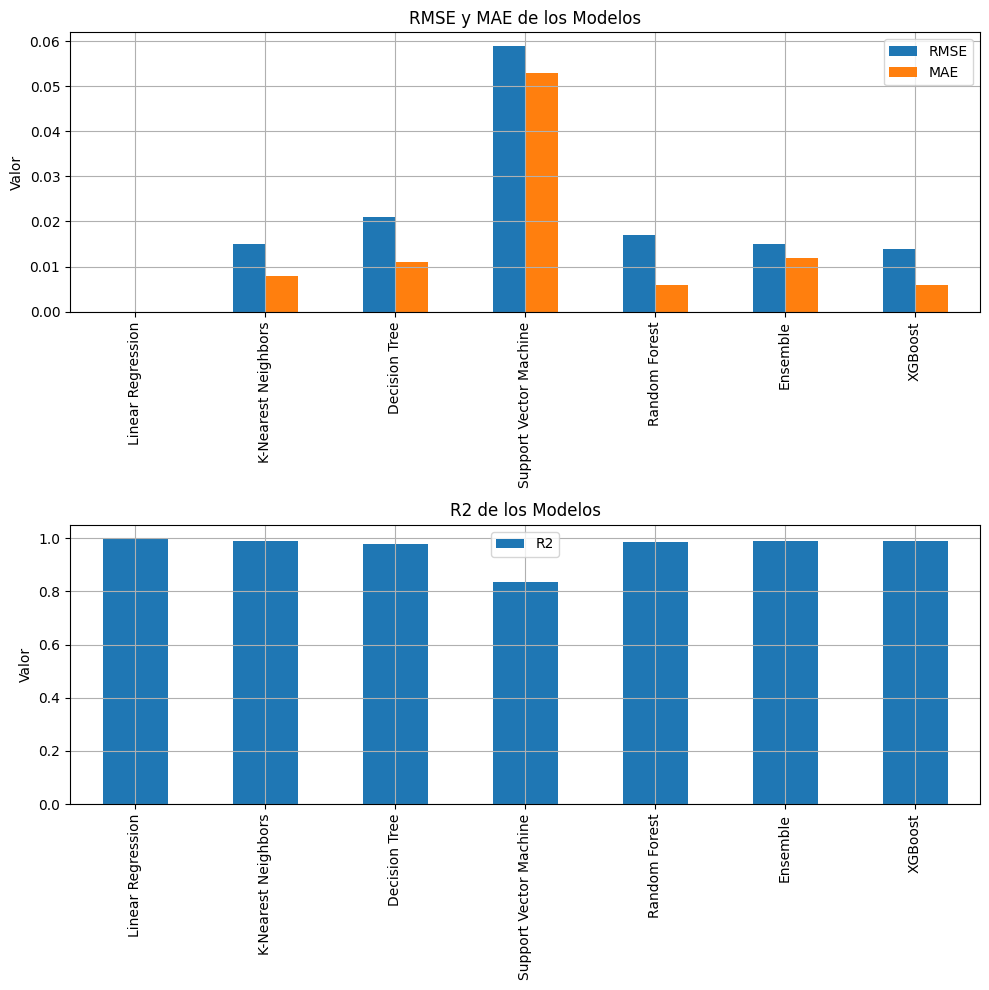

In [37]:
# Crear una figura con dos subgráficos
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Gráfico para RMSE y MAE
metricas_modelos[['RMSE', 'MAE']].plot(kind='bar', ax=ax[0])
ax[0].set_title('RMSE y MAE de los Modelos')
ax[0].set_ylabel('Valor')
ax[0].grid(True)

# Gráfico para R2
metricas_modelos[['R2']].plot(kind='bar', ax=ax[1])
ax[1].set_title('R2 de los Modelos')
ax[1].set_ylabel('Valor')
ax[1].grid(True)

plt.tight_layout()
plt.show()

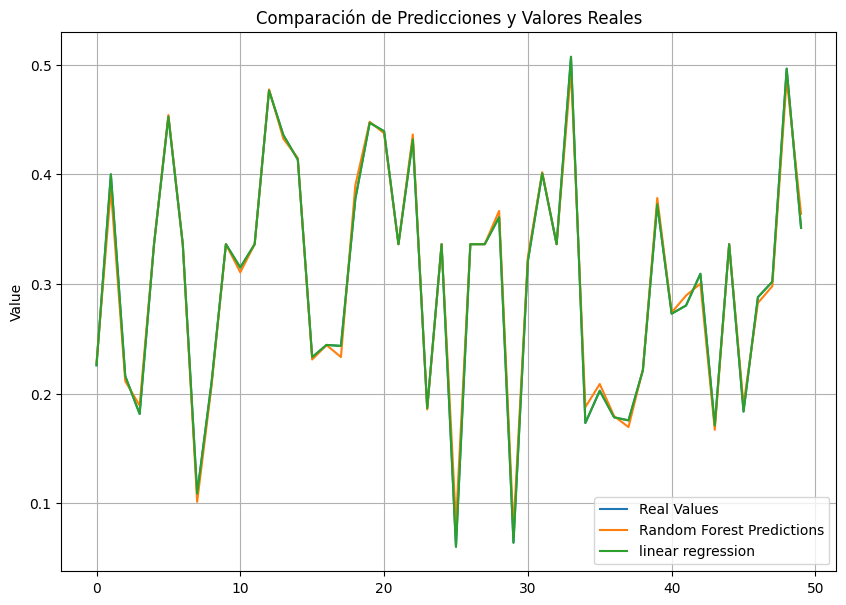

In [38]:
# Hacer predicciones
rf_predictions = rf.predict(X_test[:50])
lr_predictions = lr.predict(X_test[:50])

# Se utiliza realiza la inversa de la transformación para obtener los valores reales
# ya que la variable objetivo fue normalizada
rf_predictions = scaler.inverse_transform(rf_predictions.reshape(-1, 1))
lr_predictions = scaler.inverse_transform(lr_predictions.reshape(-1, 1))
real_values = scaler.inverse_transform(y_test[:50].values.reshape(-1, 1))

# Crear un DataFrame con las predicciones y los valores reales
comparison_df = pd.DataFrame({'Real Values': real_values.flatten(), 'Random Forest Predictions': rf_predictions.flatten(), 'linear regression': lr_predictions.flatten()})

# Crear un gráfico de líneas para comparar las predicciones con los valores reales
comparison_df.plot(kind='line', figsize=(10, 7))
plt.title('Comparación de Predicciones y Valores Reales')
plt.ylabel('Value')
plt.grid(True)
plt.show()